In [17]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from autograd.scipy.special import erf
import autograd.numpy as np
from autograd import grad

In [18]:
# Load the dataset for evaulation use
ds = load_iris()
X = ds.data[:, :2]
y = (ds.target != 0) * 1

In [47]:
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)
print(X.shape)

(150, 1)
(150, 2)


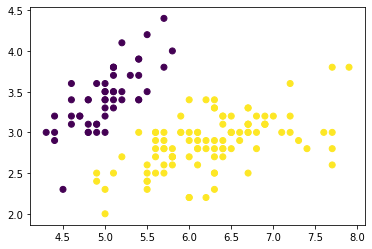

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=ds.target != 0)

In [63]:
from math import sqrt
ϕ = (1 + sqrt(5))/2

class Generic_LogisticRegression():
    def __init__(self, θ, sigmoid, α=0.01):
        self.θ = θ #initial value of the parameter
        self.sigmoid = sigmoid #a sigmoid function that squezes the input into [0,1]
        self.α = α #reguralisation parameter
    
    def __prob(self, x, theta):
        return self.sigmoid(np.dot(x, theta))
    
    def fit(self,x,y):    
        def cost_i(θ):
            m = x.shape[0]
            total_cost = -(1 / m) * np.sum(y * np.log(self.__prob(X, θ) + (1 - y) * self.__prob(X, θ))) + (self.α * np.sum(θ**2))
            return total_cost

        gradcost = grad(cost_i)
        
        θ = local_descent(self.θ, cost_i, gradcost, steps=30, α=self.α, ϵ_x=0.0001, ϵ_d=0.0001, plotting=False)
        self.θ = θ[-1]
    
    def predict_proba(self, x):
        return self.sigmoid(np.dot(x, self.θ))
    
    def predict(self, x, threshold):
        return self.predict_proba(X) >= threshold
    

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def bracket_minimum(f, x=0, s=1e-2, k=2.0): #From the Book, pag.36
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            return (a, c) if a<c else (c, a)        
        a, ya, b, yb = b, yb, c, yc
        s *= k
        
def golden_section_search(f, a, b, max_iter, plotting=True): #from the Book pag.41
    a0 =a
    b0=b
    ρ = φ-1
    d = ρ * b + (1 - ρ)*a
    yd = f(d)
    for i in range(max_iter-1):
        c = ρ*a + (1 - ρ)*b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c   
        if plotting==True:
            plt.figure()
            xx = np.linspace(a0,b0,100)
            plt.plot(xx,f(xx))
            plt.scatter(np.array([a,b]),np.array([a,b])*0)
            plt.scatter(np.array([a,b]),np.array([f(a),f(b)]))

    return (a, b) if a<b else (b, a)

def line_search(f, x, d, ϵ_x=0.0001, ϵ_d=0.0001):
    term = False
    if np.linalg.norm(d) < ϵ_d:
        term = True
        return x
    objective = lambda α : f(x + α*d)
    a, b = bracket_minimum(objective)
    a, b = golden_section_search(objective, a, b, max_iter = 5, plotting=False)
    α = (a+b)/2
    if np.linalg.norm(x+a*d-x)<ϵ_x:
        term = True
    return x + α*d, term

def local_descent(β,cost, gradient,steps=1, α=None, ϵ_x=0.0001, ϵ_d=0.0001,  plotting=False):
    Tmp = [β]
    for iteration in range(steps):
        print('local_descent_itr')
        d = gradient(β)
        d = -d/np.linalg.norm(d)
        β, term = line_search(cost, β, d, ϵ_x=ϵ_x, ϵ_d=ϵ_d)
        if term == True:
            break
        Tmp.append(β)
    return Tmp

In [64]:
# Init the weights and pass to class inititializer
theta = np.zeros((X.shape[1], 1))
model = Generic_LogisticRegression(theta, sigmoid)
model.fit(X, y)

pred = model.predict(X, 0.5)
print(pred)

pred_prob = model.predict_proba(X)
print(pred_prob)

from sklearn.metrics import accuracy_score
print('acc:', accuracy_score(y, pred))

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0.99369234]
 [0.99129117]
 [0.99056578]
 [0.9894787 ]
 [0.9934342 ]
 [0.99561436]
 [0.99051447]
 [0.99296297]
 [0.98691948]
 [0.9915873 ]
 [0.99529886]
 [0.99182918]
 [0.99061681]
 [0.98638796]
 [0.99686182]
 [0.99705671]
 [0.99561436]
 [0.9936923

In [25]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
%time model2.fit(X, y)

CPU times: user 1.02 ms, sys: 238 µs, total: 1.26 ms
Wall time: 1.02 ms


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred2 = model2.predict(X)
(pred2 == y).mean()

0.5577777777777778

In [27]:
model2.intercept_, model2.coef_

(array([-0.80059233]), array([[ 2.48966566, -3.99890697]]))